<a href="https://colab.research.google.com/github/SreyaSalil/DM-ML-CSE631-Project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

*In this colab notebook we demonstrate simple linear regression using the the <a href="https://www.kaggle.com/mustafaali96/weight-height">Weight-Height Dataset</a>*

## Import Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## View the data

We view the first five records of the dataset

In [5]:
WeightHeight = pd.read_csv('/content/sample_data/weight-height.csv')
WeightHeight.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
WeightHeight.shape

(10000, 3)

There exists no null values in this dataset. Hence, we do not have to handle missing values

In [7]:
WeightHeight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
WeightHeight.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
WeightHeight.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

## Data Preprocessing

### Converting Categorical Variables to Numeric

In [10]:
WeightHeight.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [11]:
WeightHeight["Gender"].replace({
    "Male":1, 
    "Female":2, 
    }, inplace=True)

In [12]:
WeightHeight.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


### View distribution of data

From the heatmap, we see that there is a strong correlation between ***Weight*** and ***Height***

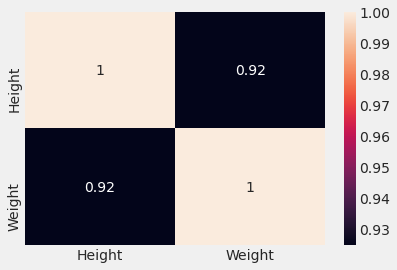

In [13]:
sns.heatmap(WeightHeight[['Height','Weight']].corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


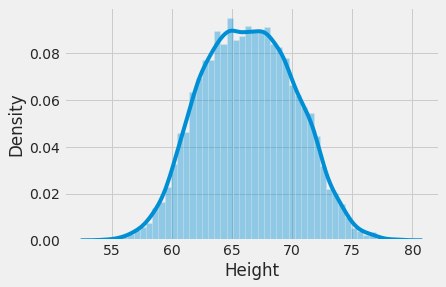

In [14]:
sns.distplot(WeightHeight['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


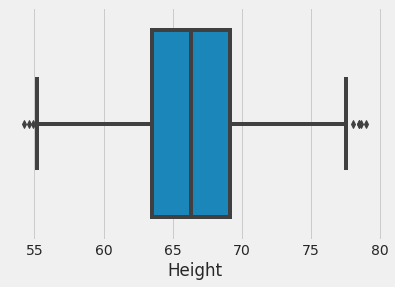

In [15]:
sns.boxplot(WeightHeight.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


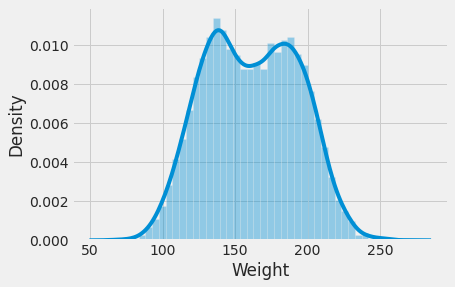

In [16]:
sns.distplot(WeightHeight['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


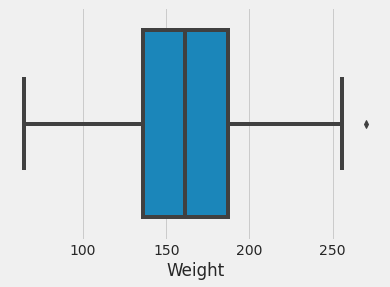

In [17]:
sns.boxplot(WeightHeight.Weight)

### Remove Outliers

In [18]:
z = np.abs(stats.zscore(WeightHeight))
print(z)

[[1.         1.94406149 2.50579697]
 [1.         0.62753668 0.02710064]
 [1.         2.01244346 1.59780623]
 ...
 [1.         0.64968792 1.02672965]
 [1.         0.69312469 0.07512745]
 [1.         1.14970831 1.48850724]]


In [19]:
print(np.where(z > 3))

(array([ 994, 1317, 2014, 2014, 3285, 3757, 6624, 9285, 9285]), array([1, 1, 1, 2, 1, 1, 1, 1, 2]))


In [20]:
WeightHeight = WeightHeight[(z < 3).all(axis=1)]

In [21]:
WeightHeight.shape

(9993, 3)

## Training the Linear Regression Model

### X and Y arrays

In [22]:
X = WeightHeight['Height']
Y = WeightHeight['Weight']

### Train Test data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Preparing data for linear regression

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train.to_frame())
X_test = pipeline.transform(X_test.to_frame())

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
# print the intercept
print(lin_reg.intercept_)

161.22908362265375


In [27]:
print(lin_reg.coef_)

[29.41538824]


### Predictions from our model

In [28]:
pred = lin_reg.predict(X_test)

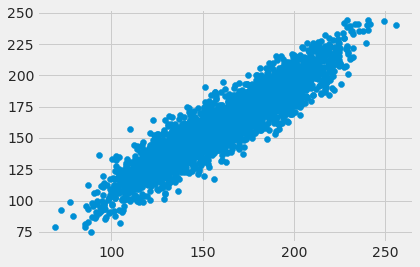

In [29]:
plt.scatter(Y_test, pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


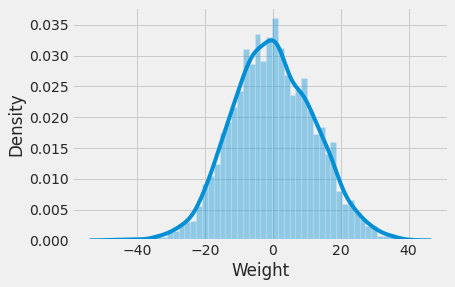

In [30]:
sns.distplot((Y_test - pred), bins=50);

## Evaluation Metrics

In [31]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X.values.reshape(-1,1), Y.values.reshape(-1,1), cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [32]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 9.721034225422272
MSE: 147.4262337193872
RMSE: 12.141920511986035
R2 Square 0.8595528884362438
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.760309219730251
MSE: 150.11363583637717
RMSE: 12.252086999216793
R2 Square 0.8521599520510766
__________________________________


In [33]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,9.721034,147.426234,12.141921,0.859553,0.58344
